# ARTIFICIAL NEURAL NETWORK

## About this Assignment and Explaination

This Assignment is related to Neural Network with backpropagation for multi class classification. In this assignment, neural network model is trained with three different dataset i.e. Digits, Alphabets, and XOR .Details of which are discussed in their respective cells.

### Neural Network Model:
The general methodology to build a Neural Network is to:
1. Define the neural network structure ( # of input units,  # of hidden units, etc).
<blockquote>In this Assignment, model consist of three layers:
<blockquote> 1. Input Layer: The size of this layer depends on the number of features of input.<br>
             2. Hidden Layer: The size of this layer can be decided on our own.<br>
             3. Output Layer: The size of this layer depends on number of classes<br>
</blockquote></blockquote>

2. Initialize the model's parameters:
<blockquote>Since we are dealing with three layer, so we need weight W1,bias b1 (whose dimensions are discussed in respective cell)for layers between input and hidden layer, and weight W2,bias b2 (dimensions are discussed in respective cell) for layers between hidden layer and output layer.After deciding the dimensions, these parameters are initialised with some small random values.
</blockquote>

3. Loop for fixed number of iteration:
<blockquote>
    1. Implement Forward Propagation:
    <blockquote>Forward Propagation is calculating the values for next layers nodes using previous input,weights and bias.
        Z represent the value before applying activation function(sigmoid/softmax) and A repesents the value after applying activation function.So, Z = weight . previous_input + bias and A = function(Z) where function is sigmoid for hidden layer and softmax for outer layer.Reason for respective case is explained in their respective cells.
    </blockquote>
    2. Compute Cost:
    <blockquote>Cost function selected in this assignment is Cross Entropy Loss whose formula is given where this function is implemented.
    </blockquote>
    3. Implement backward propagation to get the gradients:
    <blockquote> Backward propagation gives the gradients with respect to all weights and bias.Gradients calculation with respect to  parameters is little complicated.So, to generalize we take derivative of Output with respect to Z and then take derivative of Z with respect to W. Derivative of softmax with cross-entropy loss is given in this link: <br>    https://deepnotes.io/softmax-crossentropy  
    </blockquote>
    4. Update Parameters:
    <blockquote>After getting the gradients with respect to parameters, its time to update these parameters with help of its gradients.
    </blockquote>
</blockquote>

    

## Importing Required libraries

In [1]:
import numpy as np                  # For handling Arrays
import pandas as pd                 # For handling DataFrames
import matplotlib.pyplot as plt     # For visualizing images
from sklearn import datasets        # Import datasets from Sklearn

## All Important functions to be used in this Assignment including NN Model

In [2]:
"""
    Function Name: one_hot
    
    Arguments:
        A -- Labels of shape (number of examples,1)
        num_classes -- number of classes
    
    Returns:
        Converted -- vector which is one hot coded of 
                     dimension (number of examples,number of classes)
        
    Reason:
        Since we are dealing with Multi Class neural network which gives Output of 
        dimension (number of examples,number of classes) with probabilty values of
        each classes ,So to calculate cost we need same kind Actual Output Dimension
        matrix ,hence we are converting into one hot coded mtrix.
"""
def one_hot(A, num_classes):
    Identity_matrix = np.eye(num_classes)          # Converting into identity matrix
    Converted = Identity_matrix[A.reshape(-1)]     # Converting into one hot coded vector
    Converted = np.squeeze(Converted)              # Reducing the extra dimension if have
    return Converted

In [3]:
"""
    Function Name: Normalization
    
    Arguments:
        X -- Input matrix of shape (number of examples,number of features)
        
    Returns:
        X_Norm -- Normalized matrix of shape (number of examples,number of features)
        
    Reason:
        Normalization is done to keep the all the values in the same range.
        This normalization is not generalized one as it is Specifically designed for 
        this assignment as we are dealing with images which when converted into numbers/
        pixels ,the values are in the range of 0 to 255 .So, to bring in range of 0 to 1,
        it is divided by 255.
"""
def Normalization(X):
    X_Norm = X/255      # Dividing by 255 (maximum value of pixels)
    return X_Norm

In [4]:
"""
    Function Name: layer_sizes
    
    Arguments:
        X -- Input matrix of shape (number of examples,number of features)
        Y -- Labels of shape (number of examples,number of classes)
    
    Returns:
        n_x -- number of units in input layer
        n_y -- number of units in output layer
    Reason:
        To make Our Assignment more Modular , this extra function is used 
        to send number of units in input layer and number of units in output 
        layer
"""
def layer_sizes(X, Y):
    n_x =  X.shape[1]         # size of input layer
    n_y =  Y.shape[1]         # size of output layer
    return (n_x,n_y)

In [5]:
"""
    Function Name: initialize_parameters
    
    Arguments:
        n_x -- number of units in input layer
        n_h -- number of units in hidden layer
        n_y -- number of units in output layer
    
    Returns:
        parameters -- python dictionary containing our parameters:
                      W1 -- weight matrix of shape (n_h, n_x)
                      b1 -- bias vector of shape (n_h, 1)
                      W2 -- weight matrix of shape (n_y, n_h)
                      b2 -- bias vector of shape (n_y, 1)
    Reason:
        To initialize all the parameters with small random values 
        which are normally distributed (randn is used for that) 
"""
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x) 
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [6]:
"""
    Function Name: sigmoid

    Arguments:
        x -- A scalar or numpy array of any size.

    Return:
        s -- sigmoid(x)
    Reason:
        To compute the sigmoid as it is one of the activation function to be
        used in hidden layers which brings values in range 0 to 1
"""
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
"""
    Function Name: softmax

    Arguments:
        A -- matrix of dimension (number of classes,number of examples)

    Return:
        s -- softmax(x)
    Reason:
        Softmax function gives probabilty of each classes.So, used in
        Output layer of multi class neural network so that we can get
        the probabilty of occurence of each class.
        This function is specifically designed for this Neural network,
        because it takes input of dimension (number of classes,number of example)
        So, sum should be done as per axis = 0
"""
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=0, keepdims=True)

In [8]:
"""
    Function Name: forward_propagation
    
    Argument:
        X -- input matrix of size ( m,n_x )
        parameters -- python dictionary containing your parameters 
                       (output of initialization function)
    
    Returns:
        cache -- python dictionary containing:
                 Z1 -- matrix of shape (n_h, m)
                 A1 -- matrix of shape (n_h, m)
                 Z2 -- matrix of shape (n_y, m)
                 A2 -- matrix of shape (n_y, m)
    Reason:
        This Function is required to do forward proapagation to calcluate 
        the probability of the respective classes.
"""
def forward_propagation(X, parameters):
    
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = W1 @ X.T + b1
    A1 = sigmoid(Z1)
    Z2 = W2 @ A1 + b2
    A2 = softmax(Z2)
    
    # filling the dictionary
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return cache

In [9]:
"""
    Function Name: compute_cost
    
    Arguments:
        A2 -- The softmax/categorical output of output layer, 
                of shape (number of classes, number of examples)
        Y -- "true" labels one-hot matrix of shape 
                ( number of examples,number of classes )
    
    Returns:
        cost -- cross-entropy cost / MSE for perceptron
    
    Reason:
        In this assignment, I used Cross-entropy loss, or log loss, as a 
        cost function which measures the performance of a classification 
        model whose output is a probability value between 0 and 1.Since, 
        this model gives output as probabilties of classes, we used this.
        Cross-entropy loss increases as the predicted probability diverges
        from the actual label.It is represented as 
        C = -sum of p,a in P,A ( a * log(p))
        where P is predicted and A is actual.
    
"""
def compute_cost(A2, Y):
    
    m = Y.shape[0]                       # number of example

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2.T),Y)
        
    cost = - np.sum(logprobs)/m          # Summing up the error and dividing by m
    
    cost = float(np.squeeze(cost))       # making sure cost is the dimension we expect. 
                                         # E.g., turns [[17]] into 17 
    
    return cost

In [10]:
"""
    Function Name: backward_propagation
    
    Arguments:
        parameters -- python dictionary containing our parameters 
        cache      -- a dictionary containing "Z1", "A1", "Z2" and "A2".
        X          -- input matrix of shape (number of examples,number of features)
        Y          -- "true" labels matrix of shape (number of examples,number of classes)
    
    Returns:
        grads --  python dictionary containing gradients with respect to parameters
                 dW1 -- matrix of shape (n_h, n_x)
                 db1 -- matrix of shape (n_h, 1)
                 dW2 -- matrix of shape (n_y, n_h)
                 db2 -- matrix of shape (n_y, 1)
    
    Reason:
        We need back propagation to update the parameters as per error we face in 
        different layers. Depending on the cost function took gradient of outer layer
        changes but gradients of inner layer won't change as we use sigmoid function 
        for hidden layers.
        
        
"""
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[0]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']

    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2-Y.T                                # derivative with respect to Z2 i.e. o/p before activation in final o/p
    dW2 = (dZ2 @ A1.T)/m                        # derivative with respect to W2 i.e. weights of o/p layer
    db2 = np.sum(dZ2,axis=1,keepdims=True)/m    # derivative with respect to b2 i.e. bias of o/p layer
    dZ1 = (W2.T @ dZ2) * (A1 * (1-A1))          # derivative with respect to Z1 i.e. o/p before activation after first hidden
    dW1 = (dZ1 @ X)/m                           # derivative with respect to W1 i.e. weights of hidden layer
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m    # derivative with respect to b1 i.e. bias of hidden layer
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [11]:
"""
    Function Name: updates_parameters
    
    Arguments:
        parameters    -- python dictionary containing your parameters 
        grads         -- python dictionary containing your gradients 
        learning_rate -- initialised to 0.1
    
    Returns:
        parameters -- python dictionary containing your updated parameters
    
    Reason:
        We need to update parameters as per the error we recieved in the output.
"""
def update_parameters(parameters, grads, learning_rate = 0.1):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Update rule for each parameter
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2

    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [12]:
"""
    Function Name: nn_model
    
    Arguments:
        X              -- input dataset of shape (number of examples,number of features)
        Y              -- labels of shape ( number of examples,number of classes)
        n_h            -- size of the hidden layer
        num_iterations -- Number of iterations in gradient descent loop
        print_cost     -- if True, print the cost every 1000 iterations
    
    Returns:
        parameters -- parameters learnt by the model.
    
    Reason:
        This function is main Neural Network model which decides the number of units 
        in hidden layer , initializes weights and bias for network and run a loop of
        gradient descent under which there is forward propagation ,cost computation,
        backward propagation and updation of parameters.
        This model has only one hidden layer ,and every function is made accordingly
"""
def nn_model(X, Y, n_h, num_iterations = 1000, print_cost=False):
    n_x,n_y = layer_sizes(X, Y)
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations+1):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(cache['A2'], Y)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
                
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [13]:
"""
    Function Name: predict
    
    Arguments:
        parameters -- python dictionary containing your parameters 
        X          -- input data of size (number of examples,number of features)
    
    Returns:
        predictions -- A vector of shape (number of eaxmples,) which gives the 
                        prediction class 
    
    Reason:
        This function is required to predict classes for each examples in X
    
"""
def predict(parameters, X):
    
    # Computes probabilities using forward propagation
    cache = forward_propagation(X, parameters)
    
    # Retrieving A2 i.e the output matrix of shape (number of classes,number of examples) from cache
    A2 =cache['A2']
    
    # taking the class with maximum probability
    predictions = np.argmax(A2,axis=0)

    return predictions

In [14]:
"""
    Function Name: Accuracy
    
    Arguments:
        predicted  -- Predicted classes vector of shape (number of examples,) 
        Y          -- labels of shape ( number of examples,number of classes)
    
    Returns:
        accuracy -- float value which gives accuracy
    
    Reason:
        This function is required to calculate percentage of correctly 
        classified classes by training the Neural Network model
    
"""
def Accuracy(predicted,Y):
    c = 0                       # variable to store the count of correctly classified classes
    m = Y.shape[0]
    for i in range(m):
        if(predicted[i]==np.argmax(Y[i])):
            c+=1
    return float(c/m)*100

# A-Z Alphabet Dataset

Link for the Alphabet dataset is:
https://www.kaggle.com/sachinpatel21/az-handwritten-alphabets-in-csv-format?select=A_Z+Handwritten+Data.csv

This A-Z Alphabet Dataset consist more than 3 Lakh examples in numerical/pixel form in csv format.
This will take a lot of time to train and test. Since the accuracy doesn't matter for this assignment, so
I decided to reduce the number of examples to 2600 with each class has 100 examples.

So, code to reduce the data:
***********************************************
<code>
data = pd.read_csv("A_Z_Handwritten_Data.csv")
data = np.array(data)

Mdata=[]
for i in range(26):
    T=data[data[:,0]==i]
    T=T[ np.random.choice( T.shape[0],100, False),:]
    Mdata.extend(list(T))

Mdata=np.array(Mdata)
df=pd.DataFrame(Mdata)
df.to_csv("Modified_Data.csv",index=False)
</code>

************************************************
New Modified Data is saved, Link to access the data is:
***


# About Modified Alphabet Dataset

This Dataset consist of 2600 example with 100 examples for each 26 classes. 
This Dataset is in csv format which contains numerical values/pixel values of the images.
Dimension of each image 28x28 i.e. 784 features that will be input to the NN model.
This Dataset consist of 2600 rows and 785 column and first column represent the classes
where 0 repersent 'A',1 represent 'B' and so on

In [15]:
# Loading the dataset from csv file using Pandas DataFrame
Alph_data = pd.read_csv("Modified_Data.csv")

print("Shape of Alph_data: ",Alph_data.shape)

Shape of Alph_data:  (2600, 785)


In [16]:
# Converting the DataFrame into numpy array
Alph_data = np.array(Alph_data)

# Separating into Input Matrix and True Labels
X_Alph = Alph_data[:,1:785]
Y_Alph = Alph_data[:,0:1]

print("Input Matrix of Shape: ",X_Alph.shape)
print("True Labels of Shape: ",Y_Alph.shape)

Input Matrix of Shape:  (2600, 784)
True Labels of Shape:  (2600, 1)


Correct Label:  C


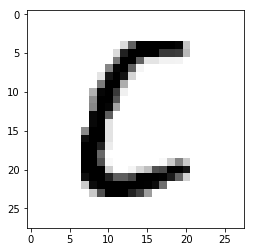

In [17]:
# Visualizing Data with the help of matplotlib imshow

# Generating random index between 0 to number of samples
n_samp = X_Alph.shape[0]
rand_ind = np.random.randint(n_samp)

plt.imshow(X_Alph[rand_ind].reshape(28,28),cmap=plt.cm.gray_r)

# printing actual class after converting into char
print("Correct Label: ",chr(Y_Alph[rand_ind]+65))

In [18]:
# Normalization done to bring all values in same range i.e. 0 to 1
X_Alph = Normalization(X_Alph)

# True Label vector is converted into one-hot coded vector (reason explained where function is declared..see above)
Y_Alph = one_hot(Y_Alph,26)

print("True Labels of Shape: ",Y_Alph.shape)

True Labels of Shape:  (2600, 26)


In [19]:
# Shuffling the dataset
m,n = X_Alph.shape
l = [i for  i in range(0, m)]
# Shuffling the Indexes
np.random.shuffle(l)
# Shuffling the Dataset according to Shuffled indexes
X_Alph = X_Alph[l]
Y_Alph = Y_Alph[l]

partition = (int)( 0.7 * m)  # Partition index for dividing into training and testing dataset
# Partitioning into training and testing dataset
X_Alph_train = X_Alph[0:partition]
Y_Alph_train = Y_Alph[0:partition]
X_Alph_test  = X_Alph[partition:m]
Y_Alph_test  = Y_Alph[partition:m]

print("X-train : ",X_Alph_train.shape)
print("Y-train : ",Y_Alph_train.shape)
print("X-test : ",X_Alph_test.shape)
print("Y-test : ",Y_Alph_test.shape)

X-train :  (1819, 784)
Y-train :  (1819, 26)
X-test :  (781, 784)
Y-test :  (781, 26)


# Digit Dataset

Digit Dataset is loaded from Sklearn Dataset which is named as load_digits
This Dataset consist of 1797 example for each 26 classes. 
This Dataset is directly loaded from sklearn so images are given numerical values/pixel values
and target which gives the class label for that image.
Dimension of each image 8x8 i.e. 64 features that will be input to the NN model.

In [20]:
# Loading the digits dataset
digits = datasets.load_digits()

# Separating Dataset into Input Matrix and its Label
X_Dig = digits.images
Y_Dig = digits.target

print("Input Matrix of Shape: ",X_Dig.shape)
print("Target Matrix of Shape: ",Y_Dig.shape)

Input Matrix of Shape:  (1797, 8, 8)
Target Matrix of Shape:  (1797,)


Correct Label:  6


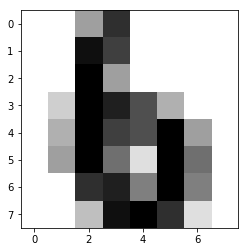

In [21]:
# Total Number of Samples
n_samples = len(digits.images)
rand_ind = np.random.randint(n_samples)

plt.imshow(X_Dig[rand_ind],cmap=plt.cm.gray_r)
print("Correct Label: ",Y_Dig[rand_ind])

In [22]:
# Reshaping into (number of samples,64)
X_Dig = X_Dig.reshape((n_samples, -1))
Y_Dig = one_hot(Y_Dig,10)

print("Input Matrix of Shape: ",X_Dig.shape)
print("Target Matrix of Shape: ",Y_Dig.shape)

Input Matrix of Shape:  (1797, 64)
Target Matrix of Shape:  (1797, 10)


In [23]:
# Shuffling the dataset
m,n = X_Dig.shape
l = [i for  i in range(0, m)]
# Shuffling the Indexes
np.random.shuffle(l)
# Shuffling the Dataset according to Shuffled indexes
X_Dig = X_Dig[l]
Y_Dig = Y_Dig[l]
partition = (int)( 0.7 * m)  # Partition index for dividing into training and testing dataset
# Partitioning into training and testing dataset
X_Dig_train = X_Dig[0:partition]
Y_Dig_train = Y_Dig[0:partition]
X_Dig_test  = X_Dig[partition:m]
Y_Dig_test  = Y_Dig[partition:m]

print("X-train : ",X_Dig_train.shape)
print("Y-train : ",Y_Dig_train.shape)
print("X-test : ",X_Dig_test.shape)
print("Y-test : ",Y_Dig_test.shape)

X-train :  (1257, 64)
Y-train :  (1257, 10)
X-test :  (540, 64)
Y-test :  (540, 10)


# Training NN Model with 0-9 Digits Dataset

In [24]:
# Train a model with a n_h number of unit in hidden layer
parameters_Dig = nn_model(X_Dig_train, Y_Dig_train, n_h = 32,
                          num_iterations = 5000, print_cost=True)

Cost after iteration 0: 6.265930
Cost after iteration 1000: 0.421290
Cost after iteration 2000: 0.239488
Cost after iteration 3000: 0.167173
Cost after iteration 4000: 0.130153
Cost after iteration 5000: 0.103858


In [25]:
# Getting the Predictions of the model on Test Dataset of Digits
predictions_Dig = predict(parameters_Dig, X_Dig_test)

True Label:  1
Predicted Label:  1


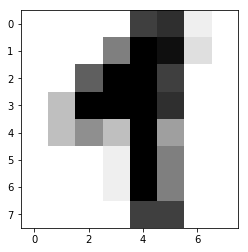

In [26]:
# Checking whether Classified Correctly or not for any random index

rand_ind = np.random.randint(X_Dig_test.shape[0])
plt.imshow(X_Dig_test[rand_ind].reshape(8,8),cmap=plt.cm.gray_r)
print("True Label: ",np.argmax(Y_Dig_test[rand_ind]))

print("Predicted Label: ",predictions_Dig[rand_ind])

In [27]:
# Printing accuracy for Train Data and Test Data
print("Accuracy for hidden layer of size 32 (TEST_DATA): "
      ,Accuracy(predictions_Dig,Y_Dig_test))
predictions1_Dig = predict(parameters_Dig, X_Dig_train)
print("Accuracy for hidden layer of size 32 (TRAIN_DATA): "
      ,Accuracy(predictions1_Dig,Y_Dig_train))

Accuracy for hidden layer of size 32 (TEST_DATA):  89.62962962962962
Accuracy for hidden layer of size 32 (TRAIN_DATA):  98.09069212410502


In [29]:
# Trying on different size of hidden layer unit
hidden_layer_sizes = [1, 4, 10, 20, 30, 40, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    parameters = nn_model(X_Dig_train, Y_Dig_train, n_h, num_iterations = 5000)
    predictions = predict(parameters, X_Dig_test)
    accuracy = Accuracy(predictions,Y_Dig_test)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

Accuracy for 1 hidden units: 17.59259259259259 %
Accuracy for 4 hidden units: 46.111111111111114 %
Accuracy for 10 hidden units: 82.77777777777777 %
Accuracy for 20 hidden units: 87.4074074074074 %
Accuracy for 30 hidden units: 88.33333333333333 %
Accuracy for 40 hidden units: 91.48148148148148 %
Accuracy for 50 hidden units: 90.92592592592592 %


# Training NN Model with A-Z Alphabets Dataset

In [30]:
# Train a model with a n_h number of unit in hidden layer
parameters_Alph = nn_model(X_Alph_train, Y_Alph_train, n_h = 256,
                           num_iterations = 5000, print_cost=True)

Cost after iteration 0: 19.774114
Cost after iteration 1000: 0.533306
Cost after iteration 2000: 0.125121
Cost after iteration 3000: 0.054537
Cost after iteration 4000: 0.034469
Cost after iteration 5000: 0.025423


In [31]:
# Getting the Predictions of the model on Test Dataset of Alphabets
predictions_Alph = predict(parameters_Alph, X_Alph_test)

True Label:  D
Predicted Label:  D


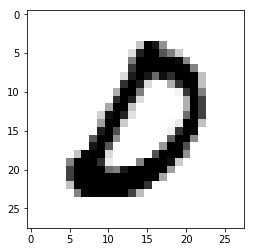

In [33]:
# Checking whether Classified Correctly or not for any random index

rand_ind = np.random.randint(X_Alph_test.shape[0])
plt.imshow(X_Alph_test[rand_ind].reshape(28,28),cmap=plt.cm.gray_r)
print("True Label: ",chr(np.argmax(Y_Alph_test[rand_ind])+65))

print("Predicted Label: ",chr(predictions_Alph[rand_ind]+65))

### Reason for this kind of accuracy on test data:
1. OverFitting : Since we are getting 100 percent accuracy for train data that means it classified all the input correctly as it was trained , but when done with some variation of data i.e. test data we are getting less accuracy.
2. Data Problem: Since the data for train and test data is done with random shuffling ,it may be possible that there are very less number of classes went to train data and remaining are there in test data. So , examples in test data may be new to the model , hence it classifies it wrong.

In [34]:
print("Accuracy for hidden layer of size 32 (TEST_DATA): :"
      ,Accuracy(predictions_Alph,Y_Alph_test))
predictions1_Alph = predict(parameters_Alph, X_Alph_train)
print("Accuracy for hidden layer of size 32 (TRAIN_DATA)::"
      ,Accuracy(predictions1_Alph,Y_Alph_train))

Accuracy for hidden layer of size 32 (TEST_DATA): : 57.49039692701664
Accuracy for hidden layer of size 32 (TRAIN_DATA):: 100.0


# XOR dataset

In [36]:
# Preparing input and target for XOR
X = [[0,0],[0,1],[1,0],[1,1]]
Y = [0,1,1,0]
# Converting into numpy array
X_XOR = np.array(X)
Y_XOR = np.array(Y)

# Converting into one hpt vector as the model uses softmax function
Y_XOR = one_hot(Y_XOR,2)

print("Input Matrix of Shape: ",X_XOR.shape)
print("Label Matrix of Shape: ",Y_XOR.shape)

Input Matrix of Shape:  (4, 2)
Label Matrix of Shape:  (4, 2)


In [38]:
print("********** X **********")
print(X_XOR)
print("**** Y one-hot encoded ****")
print(Y_XOR)

********** X **********
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
**** Y one-hot encoded ****
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


# Training NN Model with Xor Dataset.

Since Perceptron can not backpropagate because signum function is not differentiable.Hence , using the xor dataset in the model with number of hidden units as 2. 

In [41]:
# Train a model with a n_h number of unit in hidden layer
parameters_XOR=nn_model(X_XOR,Y_XOR,n_h=2,
                        num_iterations=5000,print_cost=True)

Cost after iteration 0: 0.856916
Cost after iteration 1000: 0.691553
Cost after iteration 2000: 0.640460
Cost after iteration 3000: 0.182156
Cost after iteration 4000: 0.050058
Cost after iteration 5000: 0.026661


In [42]:
# Getting the Predictions
predictions_XOR = predict(parameters_XOR, X_XOR)
print("Predictions: ",predictions_XOR)

Predictions:  [0 1 1 0]


In [43]:
print("Accuracy for hidden layer of size 2: :",
      Accuracy(predictions_XOR,Y_XOR))

Accuracy for hidden layer of size 2: : 100.0
